<a href="https://colab.research.google.com/github/IlTACK-OH/pandas_practice/blob/main/day3/07_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 깔끔한 데이터
## 넓은데이터
데이터프레임의 열은 파이썬의 변수와 비슷한 역할을 한다.<br>
하지만 이번에 다루는 데이터프레임의 열은 열 자체가 어떤값을 의미한다. 그러다보니 열 자체가 길게 늘어선 형태가 되고, 이것을 **넓은 데이터**라고 한다.<br><br>
이 장에서는 넓은 데이터를 사용해 다양한 실습을 진행할 것이다. 실습 진행에 앞 서 melt메서드에 대해 간략하게 알아보겠다.

---
#melt 메서드
`melt`메서드는 지정한 열의 데이터를 모두 행으로 정리해 준다.<br> 다음은 melt메서드를 실습할 때 사용할 인자를 정리한 표이다.

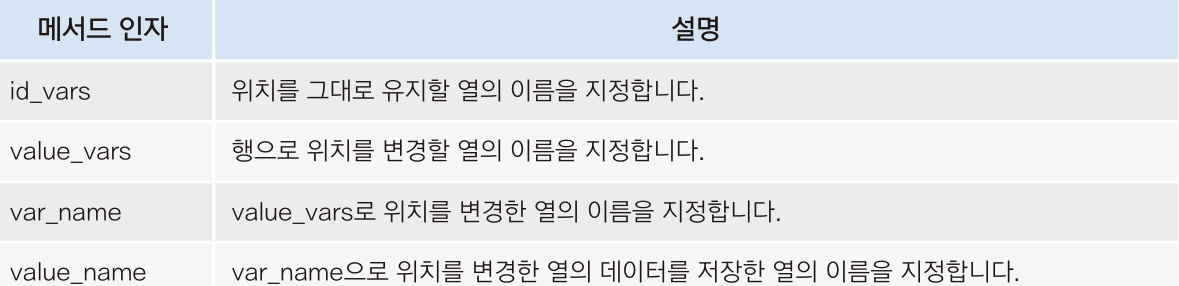

# 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

이번에는 퓨 리서치 센터에서 조사한 '미국의 소득과 종교'라는 데이터를 사용하겠다.

In [1]:
import pandas as pd
pew=pd.read_csv('pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [2]:
pew.iloc[:,0:6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


데이터 프레임을 살펴보면 소득 정보가 열을 구성하고 있다. 이를 행 데이터로 옮기고 싶을 때는 다음과 같은 code를 사용할 수 있다.

In [3]:
pew_long=pd.melt(pew,id_vars='religion')
pew_long.head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


`id_vars`인잣값으로 지정한 열을 제외한 나머지 소득 정보 열이 variable 열로 정리되고 소득 정보 열의 행 데이터도 value 열로 정리된 것을 알 수 있다.<br>
이 과정을 '`religion`열을 고정하여 피벗했다.'라고 한다.

---
 variable, value열의 열 이름은 다음과 같이 바꿀 수 있다.

In [4]:
pew_long=pd.melt(pew,id_vars='religion',var_name='income',value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


# 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

이번에는 빌보드 차트 데이터를 사용하여 실습을 진행하여 보겠다.<br>
2개 이상의 열을 고정하고 나머지 열을 행으로 바꿔보도록한다.

---
일단 빌보드 차트 데이터프레임이 어떻게 구성되어 있는지 확인해 보겠다.

In [5]:
billboard = pd.read_csv('billboard.csv')
billboard.iloc[0:5,0:16]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0


year, artist, track, time, data.entered 열을 모두 고정하고 나머지 열을 피벗하여 보겠다.

In [6]:
billboard_long = pd.melt(billboard, id_vars=['year','artist','track','time','date.entered'],var_name='week',value_name='rating')
billboard_long.head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


# ebola 데이터 집합 살펴보기

어떤 열은 여러 가지 의미를 가지고 있을 수 있다. 예를 들어 `ebola`데이터 집합의 열 중 하나인 `Deaths_Guinea`는 '사망자 수'와 '나라 이름'을 합쳐 만든 이름이다.<br>
그러면 `ebola` 데이터 집합을 살펴보면서 하나의 열이 여러 가지 의미를 가지고 있다는 것이 무언인지 구체적으로 알아보겠다.

In [7]:
ebola = pd.read_csv('country_timeseries.csv')
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [8]:
ebola.iloc[:5,[0,1,2,3,10,11]]

,Date,Day,Cases_Guinea,Cases_Liberia,Deaths_Guinea,Deaths_Liberia
0,1/5/2015,289,2776.0,NaN,1786.0,NaN
1,1/4/2015,288,2775.0,NaN,1781.0,NaN
2,1/3/2015,287,2769.0,8166.0,1767.0,3496.0
3,1/2/2015,286,NaN,8157.0,NaN,3496.0
4,12/31/2014,284,2730.0,8115.0,1739.0,3471.0


일단 Date와 Day를 고정하고 나머지를 행으로 피벗하겠다. 

In [9]:
ebola_long=pd.melt(ebola,id_vars=['Date','Day'])
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


# 열 이름 나누고 데이터 프레임에 추가하기

Cases_Guinea와 같이 2개 이상의 의미를 가지고 있는 열 이름은 밑줄을 기준으로 Cases,Guinea와 같은 방법으로 분리할 수 있다. 이때 열 이름을 분리하려면 split메서드를 사용하면 된다.<br><br>
split메서드는 기본적으로 공백을 기준으로 문자열을 자른다.

In [10]:
variable_split=ebola_long.variable.str.split('_')
variable_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [11]:
print(type(variable_split))
print(type(variable_split[0]))

<class 'pandas.core.series.Series'>
<class 'list'>


variable_split에 저장된 값의 자료형은 시리즈이고, 각각의 시리즈에 저장된 값의 자료형은 리스트이다.

---
다음은 get메서드를 사용하여 0,1번째 인덱스의 데이터를 한 번에 추출한 것이다.

In [12]:
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


# concat 메서드를 응용하여 데이터프레임에 열 추가하기

concat 메서드를 활용하면 split메서드로 분리한 데이터를 바로 데이터프레임에 추가할 수도 있다.

In [13]:
variable_split = ebola_long.variable.str.split('_',expand=True)
variable_split.columns = ['status','country']
ebola_parsed = pd.concat([ebola_long,variable_split],axis=1)

In [14]:
ebola_parsed

,Date,Day,variable,value,status,country,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea
...,...,...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali,Deaths,Mali


# 기상 데이터의 여러 열을 하나로 정리하기

기상 데이터의 날짜 열을 행 데이터로 피벗하겠다.

In [15]:
weather = pd.read_csv('weather.csv')
weather.iloc[:5,:]

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
weather_melt = pd.melt(weather,id_vars=['id','year','month','element'],var_name ='day',
                       value_name = 'temp')
weather_melt.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


날짜가 열이 정리되어 보기 편해졌지만, 아직 최고, 최저 온도가 한눈에 잘 들어오지 않는다.<br><br>
이제 `pivot_table`메서드를 사용할 차례이다. `pivot_table`메서드는 행과 열의 위치를 다시 바꿔 정리해 준다.<br> `index`인자에는 위치를 그대로 유지할 열 이름을 지정하고, `columns`인자에는 피벗할 열 이름을 지정하고,<br> values인자에는 새로운 열의 데이터가 될 열 이름을 지정하면 된다.

In [17]:
weather_tidy = weather_melt.pivot_table(index=['id','year','month','day'],
                                        columns = 'element',
                                        values='temp')
weather_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

위에서 구한 데이터프레임의 인덱스를 reset_index메서드로 새로 지정하여 보겠다.

In [18]:
weather_tidy_flat = weather_tidy.reset_index()
weather_tidy_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


# 빌보드 차트의 중복 데이터 처리하기

빌보드 차트 데이터는 `artist`,`track`,`date.entered`열의 데이터가 반복된다.<br>이런 반복되는 데이터는 따로 관리하는 것이 좋다.<br>다음 실습을 통해 중복 데이터를 처리하는 방법에 대해 알아보겠다.

In [19]:
billboard = pd.read_csv('billboard.csv')
billboard_long = pd.melt(billboard, id_vars=['year','artist','track','time','date.entered'],
                         var_name='week',value_name='rating')

print(billboard_long.shape)

billboard_long.head()

(24092, 7)


,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [20]:
billboard_long[billboard_long.track == 'Loser'].head()

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0


노래 제목이 Loser인 데이터만 따로 모아 살펴보면 중복 데이터가 꽤 많다는 것을 알 수 있다.<br>
예를 들어 가수는 고유한 값이기 떄문에 따로 관리하는 것이 데이터의 일관성을 유지하는 데 도움이 된다.<br><br>
중복 데이터를 가지고 있는 열은 `year`,`artist`,`track`,`time`이다. 이 열을 따로 모아 새로운 데이터프레임에 저장한다.

In [21]:
billboard_songs=billboard_long[['year','artist','track','time']]
billboard_songs.shape

(24092, 4)

그런 다음 `drop_duplicates`메서드로 데이터프레임의 중복 데이터를 제거한다.

In [22]:
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs.shape

(317, 4)

중복을 제거한 데이터프레임에 다음과 같이 아이디도 추가한다.

In [23]:
billboard_songs['id']=range(len(billboard_songs))
billboard_songs.head(10)

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
5,2000,98^0,Give Me Just One Nig...,3:24,5
6,2000,A*Teens,Dancing Queen,3:44,6
7,2000,Aaliyah,I Don't Wanna,4:15,7
8,2000,Aaliyah,Try Again,4:03,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,9


이제 merge메서드를 사용하여 노래 정보와 주간 순위 데이터를 합친다.

In [24]:
billboard_ratings = billboard_long.merge(billboard_songs, on=['year','artist','track','time'])
print(billboard_ratings.shape)
billboard_ratings.head()

(24092, 8)


,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
